In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***1. Read the dataset to python environment***

In [ ]:
data=pd.read_excel('iris_a70f4cdfa743646e9007faae65e23593.xls')

In [ ]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


***2. Do the necessary pre-processing steps***

In [ ]:
#Checking for NaN values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

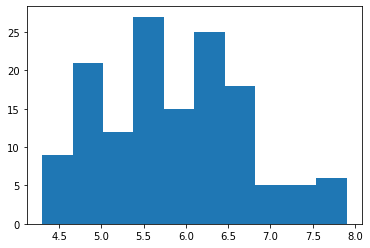

In [ ]:
#Plotting histogram of field SL
plt.hist(data['SL'])
plt.show()

In [ ]:
#Replacing NaN values with mean
data['SL']=data['SL'].fillna(data['SL'].mean())

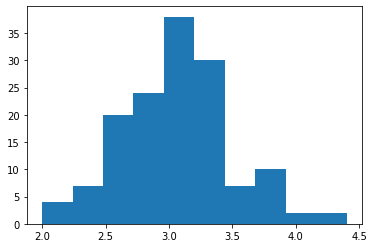

In [ ]:
#Plotting histogram of field SW
plt.hist(data['SW'])
plt.show()

In [ ]:
#Replacing NaN values with mean
data['SW']=data['SW'].fillna(data['SW'].mean())

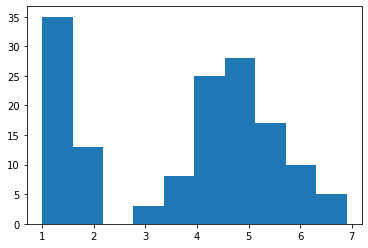

In [ ]:
#Plotting histogram of field PL
plt.hist(data['PL'])
plt.show()

In [ ]:
#Replacing NaN values with median
data['PL']=data['PL'].fillna(data['PL'].median())

In [ ]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

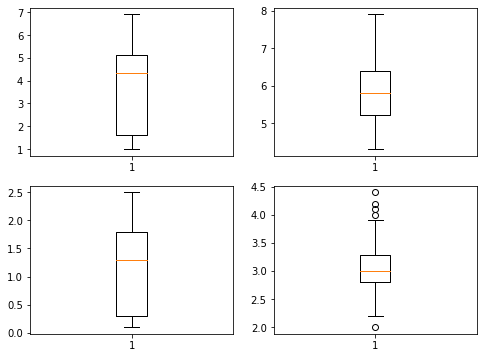

In [ ]:
#checking for outliers
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.boxplot(data['PL'])
plt.subplot(2,2,2)
plt.boxplot(data['SL'])
plt.subplot(2,2,3)
plt.boxplot(data['PW'])
plt.subplot(2,2,4)
plt.boxplot(data['SW'])
plt.show()

In [ ]:
#Only the field SW had outliers which need to be handled
#Handling the outliers in SW field
#Quartile values
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [ ]:
#InterQuartile Range
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [ ]:
upper_limit

3.9250000000000003

In [ ]:
lower_limit

2.1249999999999996

In [ ]:
#Outlier list
outlier_list=[]
for i in data['SW']:
  if (i>upper_limit) or (i<lower_limit):
    outlier_list.append(i)

In [ ]:
outlier_list

[4.0, 4.4, 4.1, 4.2, 2.0]

In [ ]:
#Indexes hold the index of outliers
indexes=data[(data['SW']>upper_limit) | (data['SW']<lower_limit)].index


In [ ]:
indexes

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [ ]:
#dropping outliers
data1=data.drop(indexes)

In [ ]:
#Doing label encoding of categorical variable
data1.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [ ]:
#doing Label encoding of Classification column
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data1['Classification']=lb.fit_transform(data1['Classification'])

In [ ]:
data1.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


***3. Find out which classification model gives the best result (also do random
forest algorithm)***

**USING SVM**

In [ ]:
#USING SVM
from sklearn.svm import SVC
#Creating instanceof SVC
s=SVC(kernel='linear')

In [ ]:
#Splitting data into target and features
X=data1.drop('Classification',axis=1)
Y=data1['Classification']

In [ ]:
# performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [ ]:
#fitting into model and predicting
s=s.fit(X_train,Y_train)
s_predict=s.predict(X_test)

In [ ]:
#Evaluating model
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(Y_test,s_predict)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]])

In [ ]:
accuracy_score(Y_test,s_predict)

0.896551724137931

**USING DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [ ]:
# performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [ ]:
d=d.fit(X_train,Y_train)
d_predict=d.predict(X_test)

In [ ]:
#Evaluating model
confusion_matrix(Y_test,d_predict)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]])

In [ ]:
accuracy_score(Y_test,d_predict)

0.896551724137931

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [ ]:
# performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [ ]:
r=r.fit(X_train,Y_train)
r_predict=r.predict(X_test)

In [ ]:
#Evaluating model
confusion_matrix(Y_test,r_predict)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]])

In [ ]:
accuracy_score(Y_test,r_predict)

0.9310344827586207

***Random Forest Method has the highest accuracy among the three Classification models as it created multiple decision trees and from that the one with highest Information Gain is selected***